Labels

Each training and test example is assigned to one of the following labels:

0 - t-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Cost

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot

LOAD DATASET

Fashion-MNIST dataset

source: https://www.kaggle.com/datasets/zalando-research/fashionmnist


In [ ]:
pip install keras

In [ ]:
conda install keras


ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
n=5

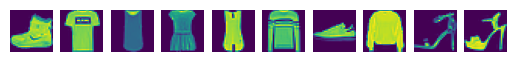

label for each of the above image is: [9 0 0 3 0 2 7 2 5 5]


In [ ]:
import matplotlib
#visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_train[i])
  plt.axis('off')
plt.show()
print('label for each of the above image is: %s' % (y_train[0:10]))

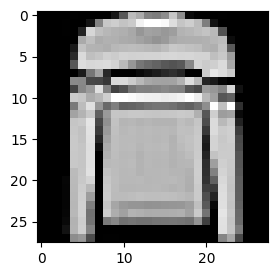

Label:  2


In [ ]:
plt.figure(figsize =[3,3])
plt.imshow(X_train[n],cmap='gray')
plt.show()
print('Label: ', y_train[n])

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

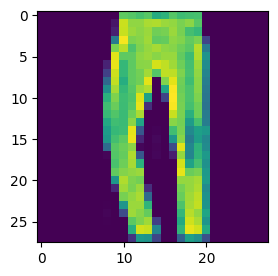

Label:  1


In [ ]:
plt.figure(figsize =[3,3])
plt.imshow(X_test[n])
plt.show()
print('Label: ', y_test[n])

Data Pre-processing

In [ ]:
#reshaping X data (n, 28, 28) => (n,784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))


In [ ]:
y_train = to_categorical(y_train, num_classes=17)
y_test = to_categorical(y_test, num_classes=17)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 17) (10000, 17)


In [ ]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import cv2, numpy as np
X_train = X_train.reshape(-1, 28, 28, 1)

model = Sequential()
model.add(ZeroPadding2D((1,1), input_shape = (28,28,1)))
model.add(Convolution2D(64, 3, 3, activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation = 'relu'))
model.add(MaxPooling2D((2,2), strides =(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation = 'relu'))
model.add(MaxPooling2D((1,1), strides =(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation = 'relu'))


model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation = 'relu'))


model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation = 'relu'))

model.add(Flatten())
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation = 'softmax'))

model.summary()


ModuleNotFoundError: ignored

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs =20, verbose = 1)